Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive
drive.mount("/drive")
%matplotlib inline

import warnings
import gc
warnings.filterwarnings('ignore')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


Import historical stocks data file.
Dataset provided by Kaggle: https://www.kaggle.com/datasets/camnugent/sandp500

In [5]:
all_stocks_df = pd.read_csv("/drive/My Drive/Study Projects/all_stocks_5yr.csv")

all_stocks_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
stock_names = all_stocks_df['Name'].unique()
print(sorted(stock_names))

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY', 'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBG', 'CBOE', 'CBS', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 

Walmart - WMT\
Target - TGT\
Home Depot - HD\
Lowe's - LOW

In [7]:
all_stocks_limited_df = all_stocks_df.loc[all_stocks_df['Name'].isin(['WMT','TGT','HD','LOW'])]
#Make sure that dataframe is sorted by date
all_stocks_limited_df = all_stocks_limited_df.sort_values('date')
all_stocks_limited_df.head()

,date,open,high,low,close,volume,Name
270168,2013-02-08,66.55,67.02,66.410,67.01,4458040,HD
535551,2013-02-08,62.18,63.01,62.180,62.49,4136558,TGT
349910,2013-02-08,38.77,39.20,38.710,39.03,5913715,LOW
595716,2013-02-08,71.20,71.64,71.070,71.48,5906823,WMT
270169,2013-02-11,66.87,66.98,66.225,66.38,3952707,HD


In [8]:
#Create new dataset with mean price values by month for selected stocks
all_stocks_limited_df['year'] = pd.to_datetime(all_stocks_limited_df['date']).dt.year
all_stocks_limited_df['month'] = pd.to_datetime(all_stocks_limited_df['date']).dt.month
all_stocks_aggregated_df = pd.DataFrame
all_stocks_aggregated_df = all_stocks_limited_df.groupby(['year','month','Name'])['low','high','close'].aggregate('mean').reset_index()
all_stocks_aggregated_df['date'] = pd.to_datetime(all_stocks_aggregated_df[['year', 'month']].assign(DAY=1))
print(all_stocks_aggregated_df)


     year  month Name         low        high       close       date
0    2013      2   HD   66.196071   67.411186   66.786429 2013-02-01
1    2013      2  LOW   38.043214   38.957143   38.432857 2013-02-01
2    2013      2  TGT   62.197143   63.336421   62.851429 2013-02-01
3    2013      2  WMT   70.118214   71.115357   70.600714 2013-02-01
4    2013      3   HD   69.450140   70.319950   69.924500 2013-03-01
..    ...    ...  ...         ...         ...         ...        ...
239  2018      1  WMT  102.353905  103.872610  103.264762 2018-01-01
240  2018      2   HD  187.448000  196.464000  191.862000 2018-02-01
241  2018      2  LOW   99.199000  103.057000  100.616000 2018-02-01
242  2018      2  TGT   71.622000   74.303000   72.930000 2018-02-01
243  2018      2  WMT  100.736000  104.662000  102.768000 2018-02-01

[244 rows x 7 columns]


In [9]:
#create separate dataframe for each stock (for ease of use)
#Walmart dataframce
wmt_df = all_stocks_aggregated_df.loc[all_stocks_aggregated_df['Name'].isin(['WMT'])]
#Target dataframce
tgt_df = all_stocks_aggregated_df.loc[all_stocks_aggregated_df['Name'].isin(['TGT'])]
#Lowe's dataframce
low_df = all_stocks_aggregated_df.loc[all_stocks_aggregated_df['Name'].isin(['LOW'])]
#Home Depot dataframce
hd_df = all_stocks_aggregated_df.loc[all_stocks_aggregated_df['Name'].isin(['HD'])]
print(wmt_df)

     year  month Name         low        high       close       date
3    2013      2  WMT   70.118214   71.115357   70.600714 2013-02-01
7    2013      3  WMT   72.978825   73.802000   73.436500 2013-03-01
11   2013      4  WMT   77.114714   78.206477   77.689545 2013-04-01
15   2013      5  WMT   77.371364   78.273727   77.816364 2013-05-01
19   2013      6  WMT   74.587340   75.607995   74.978000 2013-06-01
..    ...    ...  ...         ...         ...         ...        ...
227  2017     10  WMT   84.055405   85.263864   84.828636 2017-10-01
231  2017     11  WMT   92.449048   93.977862   93.321905 2017-11-01
235  2017     12  WMT   97.405650   98.467000   97.836000 2017-12-01
239  2018      1  WMT  102.353905  103.872610  103.264762 2018-01-01
243  2018      2  WMT  100.736000  104.662000  102.768000 2018-02-01

[61 rows x 7 columns]


In [10]:
#Run garbage collector
del all_stocks_df
del all_stocks_limited_df
gc.collect()

4

Comparative analysis using python’s matplotlib library

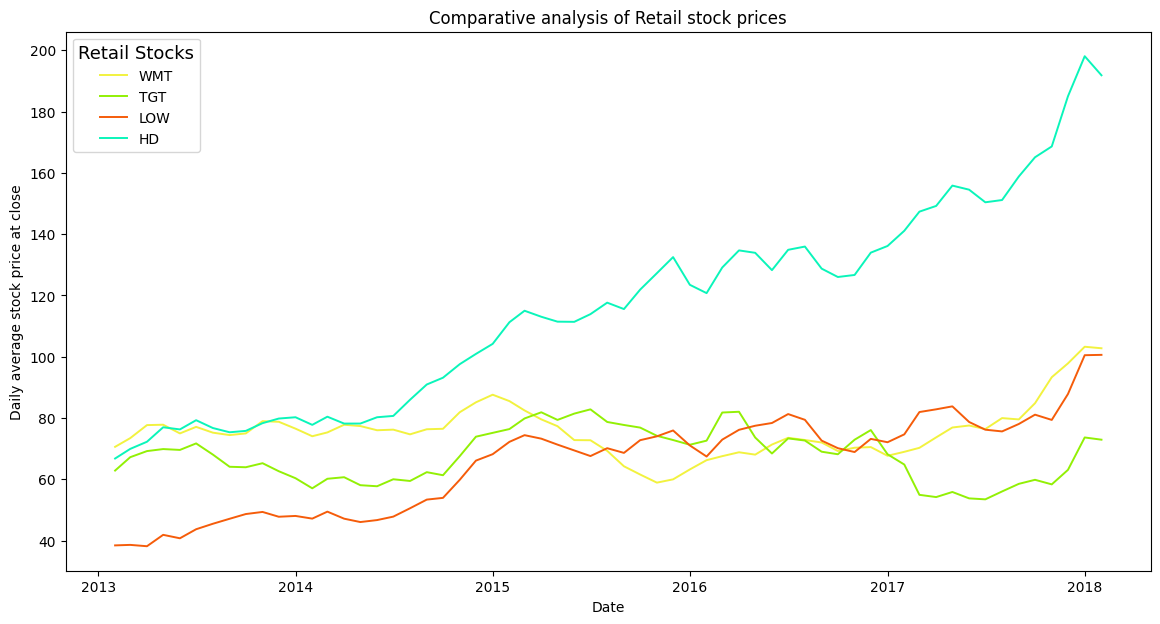

In [11]:
# retail stocks price comparison
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(wmt_df['date'], wmt_df['close'],label='WMT', color='#f2f23f', lw=1.4)
ax.plot(tgt_df['date'], tgt_df['close'],label='TGT', color='#92f005', lw=1.4)
ax.plot(low_df['date'], low_df['close'],label='LOW', color='#f55c0a', lw=1.4)
ax.plot(hd_df['date'], hd_df['close'],label='HD', color='#0af5ba', lw=1.4)

ax.set_title("Comparative analysis of Retail stock prices")
ax.set_xlabel("Date")
ax.set_ylabel("Daily average stock price at close")
ax.legend( fontsize="medium", title="Retail Stocks", title_fontsize=13)

plt.show()

Period of growth analysis

[45.56226667071356, 16.035548686244194, 161.79682563282904, 187.27692751949178]
['WMT', 'TGT', 'LOW', 'HD']


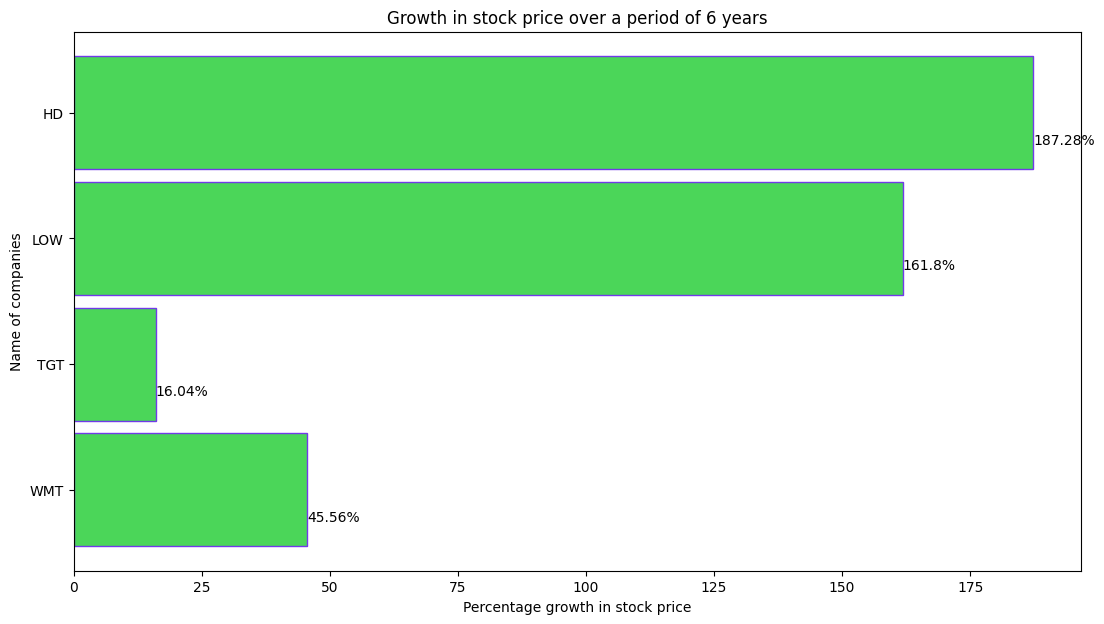

In [20]:
# list of stock dataframes
list_df = [wmt_df,tgt_df,low_df,hd_df]

# loop through the the list_df to find mini and maxi of each stocks
min = [df[df['date'] == df['date'].min()]['close'].values.item() for df in list_df]
max = [df[df['date'] == df['date'].max()]['close'].values.item() for df in list_df]

# find list of abosolute difference between both stock price
diff = np.array(max) - np.array(min)

# find the percentage growth
growth = (diff/min)*100
growth_list = growth.tolist()
name_list = [df['Name'].unique()[0] for df in list_df]

print (growth_list)
print (name_list)

# visualize the growth of the stocks
fig, ax = plt.subplots(figsize=(13,7))
ax.barh(y=name_list, width=growth_list, height=0.9, color=['#4bd659'],
       edgecolor='#713ae8')
for p in ax.patches:
    ax.annotate(f'{round(p.get_width(),2)}%', (p.get_width(), p.get_y() +0.2))
ax.set_xlabel('Percentage growth in stock price')
ax.set_ylabel('Name of companies')
ax.set_title("Growth in stock price over a period of 6 years")
plt.show()

In [21]:
cmap = sns.color_palette('Set2')
cmap

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

Detailed Analysis of Home Depot stock

In [22]:
def plot_function(var):
    plt.figure(figsize=(10,6))
    plt.plot(hd_df['date'][12:],hd_df[var][12:], color=cmap[4])
    plt.xlabel("date", fontsize=14)
    plt.ylabel(var , fontsize=14)
    plt.title(f"{var} price over a year for HD stock", fontsize=15)
    plt.show()

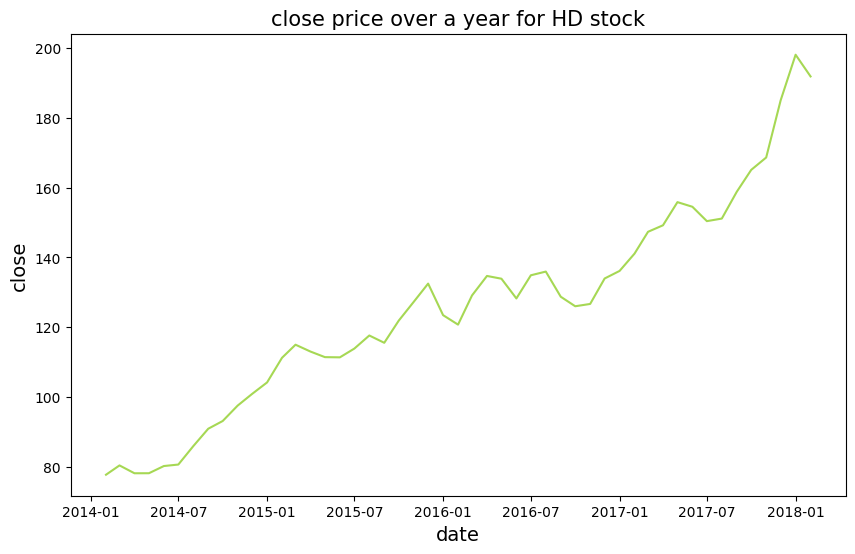

In [23]:
plot_function('close')

In [24]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 240
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    61 non-null     int64         
 1   month   61 non-null     int64         
 2   Name    61 non-null     object        
 3   low     61 non-null     float64       
 4   high    61 non-null     float64       
 5   close   61 non-null     float64       
 6   date    61 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 3.8+ KB


Moving Average

In [25]:
hd_df['mavg_12'] = hd_df['close'].rolling(window = 12).mean().shift(1)

In [28]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
hd_df[['date','close', 'mavg_12']][12:]

,date,close,mavg_12
48,2014-02-01,77.77,75.65
52,2014-03-01,80.44,76.57
56,2014-04-01,78.19,77.44
60,2014-05-01,78.20,77.94
64,2014-06-01,80.26,78.04
68,2014-07-01,80.69,78.37
72,2014-08-01,85.96,78.49
76,2014-09-01,90.94,79.25
80,2014-10-01,93.16,80.55
84,2014-11-01,97.57,82.00


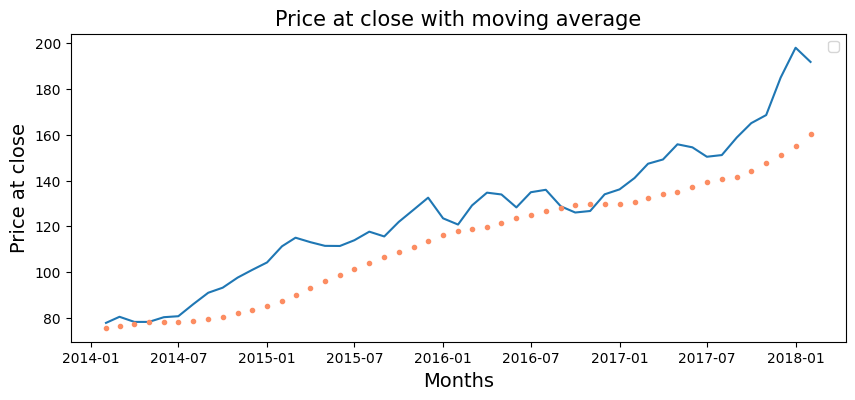

In [30]:
plt.figure(figsize=(10,4))
plt.plot(hd_df['date'][12:],hd_df['close'][12:])
plt.plot(hd_df['date'][12:],hd_df['mavg_12'][12:], '.', color=cmap[1])
plt.xlabel("Months", fontsize=14)
plt.ylabel("Price at close", fontsize=14)
plt.title("Price at close with moving average", fontsize=15)
plt.legend()

In [31]:
# Mean absolute percentage error of the forecasted price at close vs actual values
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/actual))*100, )

In [32]:
print("MAPE with Moving avearge is: ")
get_mape(hd_df['close'][36:].values,
         hd_df['mavg_12'][36:].values)

MAPE with Moving avearge is: 


9.0

In [33]:
# mean squared error of the moving average smoothing!
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(hd_df['close'][36:].values,
                           hd_df['mavg_12'][36:].values))

17.26920421683786

Exponential Smoothing

In [34]:
hd_df['ewm'] = hd_df['close'].ewm(alpha=0.4).mean()

In [38]:
hd_df[12:]

,year,month,Name,low,high,close,date,mavg_12,ewm
48,2014,2,HD,77.05,78.23,77.77,2014-02-01,75.65,78.49
52,2014,3,HD,80.07,81.03,80.44,2014-03-01,76.57,79.27
56,2014,4,HD,77.67,78.90,78.19,2014-04-01,77.44,78.83
60,2014,5,HD,77.73,78.69,78.20,2014-05-01,77.94,78.58
64,2014,6,HD,79.76,80.67,80.26,2014-06-01,78.04,79.25
68,2014,7,HD,80.26,81.05,80.69,2014-07-01,78.37,79.82
72,2014,8,HD,85.24,86.38,85.96,2014-08-01,78.49,82.28
76,2014,9,HD,90.17,91.69,90.94,2014-09-01,79.25,85.74
80,2014,10,HD,92.25,93.97,93.16,2014-10-01,80.55,88.71
84,2014,11,HD,96.42,98.18,97.57,2014-11-01,82.00,92.25


In [39]:
# get MAPE for the exponential smoothing:
print("Accuracy with Exponential smoothing is: ")
get_mape(hd_df[['close']][12:].values,
         hd_df[['ewm']][12:].values)


Accuracy with Exponential smoothing is: 


3.0

MAPE is much lessor in EWM compared to previous smoothing method

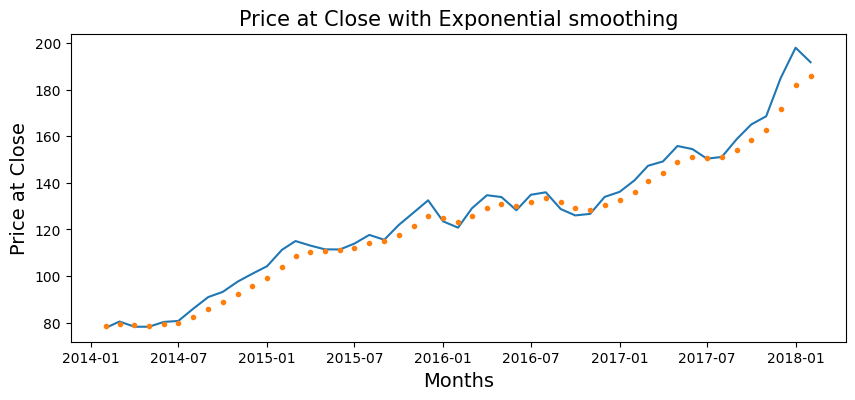

In [41]:
plt.figure(figsize=(10,4))
plt.plot(hd_df['date'][12:],hd_df['close'][12:])
plt.plot(hd_df['date'][12:],hd_df['ewm'][12:], '.')
plt.xlabel("Months", fontsize=14)
plt.ylabel("Price at Close", fontsize=14)
plt.title("Price at Close with Exponential smoothing", fontsize=15)
plt.show()